# Examen Módulo 2

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

# ANTES DE EMPEZAR

Escribe tu número de expediente como semilla

In [6]:
import numpy as np
np.random.seed(753710)
print("Integración Monte Carlo tipo 1 - Problema ", np.random.choice([1, 2]))
print("Integración Monte Carlo tipo 2 - Problema ", np.random.choice([1, 2]))

Integración Monte Carlo tipo 1 - Problema  2
Integración Monte Carlo tipo 2 - Problema  1


---
### Caminata aleatoria

Una persona entra a un casino con 20 pesos.

Su apuesta inicial es de 10 pesos, y tiene la idea de modificar su apuesta de la siguiente manera:
- Si gana, disminuye su apuesta en 2 pesos
- Si pierde, aumenta su apuesta en 2 pesos

Este jugador apostará hasta que haya ganado lo suficiente para que su apuesta se vuelva 0 o cuando quede en bancarrota.

1. ¿Cuál es el capital esperado?
2. En promedio, ¿cuánto apostará en el tercer juego?
3. ¿Cuál es la probabilidad de que quede en bancarrota?
4. ¿Cuál es la probabilidad de que "gane"? (Que su apuesta se vuelva cero)

In [9]:
import numpy as np
apuesta=[0,1]

dinerofinal=[]
dineroapostadores=[]
fase3=[]
totaldineroapostadores=[]
bancarrota=0
Victoria_yay=0
NN=10000
for i in range (NN):
    camino=[]
    dinero=20
    dineroapostado=10
    while dineroapostado>0 and dinero>0:
        Tiro=np.random.choice(apuesta)
        if Tiro==1:
            dinero+=dineroapostado
            dineroapostado-=2
         
        elif Tiro==0:
            dinero-=dineroapostado
            dineroapostado+=2
        dineroapostadores.append(dineroapostado)
    totaldineroapostadores.append(dineroapostadores)   
    
    dinerofinal.append(dinero)

    if dinero<=0:
        bancarrota+=1
    elif dineroapostado==0:
        Victoria_yay+=1

for i in range (len(totaldineroapostadores)):
    silla=totaldineroapostadores[i]
    fase3.append(silla[2])

   

In [10]:
incisoa=np.mean(dinerofinal)
incisob=np.mean(fase3)
incisoc=bancarrota/NN
incisod=Victoria_yay/NN
incisoa,incisob,incisoc,incisod

(19.9632, 8.0, 0.6536, 0.3464)

Para el inciso A promedie todos los resultados de el dinero que quedaba al final, para el inciso C, cree una lista en la que se iba guardando la cantidad de dinero apostado, después mediante un ciclo guardé en otra lista el dinero apostado en la posición 3, y le saqué el promedio. Para el inciso c hice que si se quedaba en bancarrota se fueran sumando los casos, y al final lo dividí por el número de casos. Para finalizar el inciso d hice lo mismo pero cuando dejaba de apostar

---
### Simulación Monte Carlo

Jugadores A y B están jugando a tirar una moneda sesgada (60\% de probabilidad de caer en águila) por turnos. El jugador A empieza el juego y luego va el jugador B. Se lanza la moneda por turnos hasta que alguien tira águila y gana. ¿Cuál es la probabilidad de que el jugador A gane?

In [13]:
import numpy as np
AA=0
BB=0
Nn=10000
for h in range (Nn):
    A0=0
    B0=0
    while A0!=1 and B0!=1:
        tiro_moneda=np.random.choice([1,0], p=[0.6,0.4])
        if tiro_moneda==1:
            A0=1
            AA+=1
            break
            
        tiro_moneda=np.random.choice([1,0], p=[0.6,0.4])
        if tiro_moneda==1:
            B0=1
            BB+=1
            break
AA/Nn

0.7177

In [14]:
BB/Nn

0.2823

Aquí simulé los tiros por turnos, primero el A y luego el B, y le saqué la probabilidad entre el número de casos a favor y todos

---
### Integración Monte Carlo tipo 1 - Problema 1
$$ f_1(x) = 5\frac{\sin{x}}{x} $$
$$ f_2(x) = \frac{1}{8} $$

Dadas $f_1$ y $f_2$, ¿cuál es el área que hay entre las dos curvas en un intervalo de $[0.1, 7]$? (Aproxima los cruces)

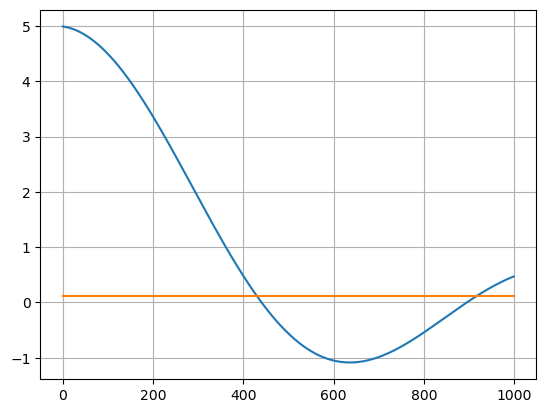

In [36]:
def fcorreccion1 (x):
    return 5* (np.sin(x))/x
def fcorreccion2 (x):
    return 1/8
a=0.1
b=7
import matplotlib.pyplot as plt
plt.figure()
x=np.linspace(a,b,1000)
y2=np.full_like(x,1/8)
plt.plot(fcorreccion1(x))
plt.plot(y2)
plt.grid()

In [57]:
Punto1=3.1
Punto2=6.4
n=10000
Areaa1=((montecarlo_tipo_1(fcorreccion1,0.1,Punto1,n))-(montecarlo_tipo_1(fcorreccion2,0.1,Punto1,n)))
Areaa2=-(montecarlo_tipo_1(fcorreccion1,Punto1,Punto2,n))+(montecarlo_tipo_1(fcorreccion2,Punto1,Punto2,n))
Areaa3=(montecarlo_tipo_1(fcorreccion1,Punto2,7,n))-(montecarlo_tipo_1(fcorreccion2,Punto2,7,n))
Areaa1+Areaa2+Areaa3

11.090386643420203

### Integración Monte Carlo tipo 1 - Problema 2
$$ f_1(x) = \sin{(x)} e^{-x} $$
$$ f_2(x) = \frac{x}{10} $$

Dadas $f_1$ y $f_2$, ¿cuál es el área que hay entre las dos curvas en un intervalo de $[0, 4]$? (Aproxima los cruces)

In [23]:
import numpy as np
def f1 (x):
    return (np.sin(x))*np.exp(-x)
def f2 (x):
    return x/10
def montecarlo_tipo_1(f,a,b,n):
    u=np.random.uniform(a,b,n)
    return np.mean(f(u))*(b-a)
a=0
b=4
n=100000

0.5138790836111005

0.7995127998111428

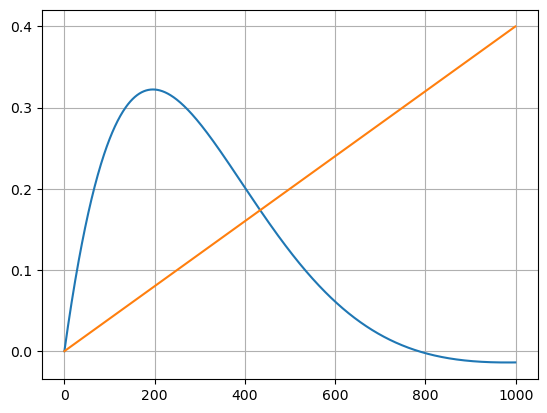

In [25]:
import matplotlib.pyplot as plt
a=0
b=4
plt.figure()
x=np.linspace(a,b,1000)
plt.plot(f1(x))
plt.plot(f2(x))
plt.grid()

Calculé el montecarlo tipo 1 para ambas y las resté, para el área de la curva es la diferencia de ambos, por lo que es:

In [59]:
Punto1b=0
Punto2b=1.75
Punto3b=4
n=10000
Areaa1b=((montecarlo_tipo_1(f1,Punto1b,Punto2b,n))-(montecarlo_tipo_1(f2,Punto1b,Punto2b,n)))
Areaa2b=-(montecarlo_tipo_1(f1,Punto2b,Punto3b,n))+(montecarlo_tipo_1(f2,Punto2b,Punto3b,n))
Areaa1b+Areaa2b

0.839708737754808

---
### Integración Monte Carlo tipo 2 - Problema 1

Se tienen las siguientes desigualdades:

1.
$$ ((\frac{x}{4})^2 + (\frac{y-1}{2.5})^2 < 1)\ \& \ ((x+1.5)^2 + (y-1)^2 > 0.2) \ \& \ ((x-1.5)^2 + (y-1)^2 > 0.2) $$


2. $$ (x+3)^2 + (y-4)^2 < 2 $$


3. $$ (x-3)^2 + (y-4)^2 < 2 $$

4. $$ x^2 + (\frac{y+5}{2})^2 < 8 $$

1. Crea una función de Python para cada desigualdad.

In [ ]:
def f3 (x,y):
    return ((x/4)**2+((y-1)/2.5)**2<1)&((x+1.5)**2+(y-1)**2>0.2)&((x-1.5)**2+(y-1)**2>0.2)
def f4 (x,y):
    return (x+3)**2+(y-4)**2<2
def f5 (x,y):
    return (x-3)**2+(y-4)**2<2
def f6 (x,y):
    return (x**2+((y+5)/2)**2<8)


2. Crea una función que agrupe estas desigualdades (utiliza el operador `|` para unir las desigualdades)

In [ ]:
def ftotal(x, y) :
    return f3(x, y) | f4(x, y) | f5(x, y) | f6(x, y)

3. Encuentra los límites de integración

In [ ]:
ax=-5
bx=5
ay=-11
by=6
n=10000
x=np.random.uniform(ax,bx,n)
y=np.random.uniform(ay,by,n)
plt.figure()
plt.scatter(x,y,c=ftotal(x,y))

4. Aproxima el área de la región descrita por la agrupación de las desigualdades con 1 millón de puntos.

In [ ]:
N=1000000
def montecarlo_tipo_2(region,ax,bx,ay,by,n):
    x=np.random.uniform(ax,bx,n)
    y=np.random.uniform(ay,by,n)
    AR=(bx-ax)*(by-ay)
    return region(x,y).mean()*AR
montecarlo_tipo_2(ftotal,ax,bx,ay,by,N)
    

5. ¿Cuál es el error relativo?

In [ ]:
AR=(bx-ax)*(by-ay)
AD=montecarlo_tipo_2(ftotal,ax,bx,ay,by,N)
def C(AR,AD):
    return ((1-(AD/AR))/(AD/AR))**0.5
error=np.log10(C(AR,AD))-0.5*np.log10(N)
error

Aquí fusione las funciones con este signo | y encontré los límites. Después apliqué el montecarlo tipo 2, pero no pude sacar el error relativo

### Integración Monte Carlo tipo 2 - Problema 2

Se quiere calcular el volumen de una alberca donde su superficie está dada por la siguiente desigualdad:
$$ (x^2 + (\frac{y}{2})^2 \leq 1)\ | \ ((x-1)^2 + (y+2)^2 \leq 2) $$

1. Define una función en Python para la desigualdad y utilízala para encontrar límites de integración adecuados para esta superficie.

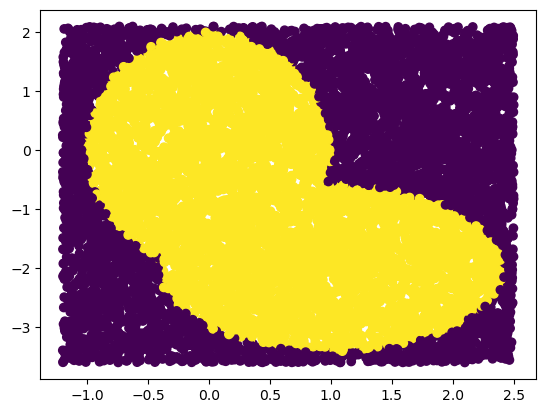

In [80]:
import numpy as np
import matplotlib.pyplot as plt
def ftotal2 (x,y):
    return (x**2+(y/2)**2<=1)|((x-1)**2+(y+2)**2<=2)
ax=-1.2
bx=2.5
ay=-3.6
by=2.1
n=10000
x=np.random.uniform(ax,bx,n)
y=np.random.uniform(ay,by,n)
plt.figure()
plt.scatter(x,y,c=ftotal2(x,y))

La profundidad de la alberca debe ser de $1.35$ metros. En otras palabras

$$ (z \leq 0)\ \& \ (z \geq -1.35)$$

2. Define una función para esta desigualdad de profundidad.

In [175]:
def profundidad(z):
    return (z<=0) & (z>=-1.35)
profundidad(-0.5)

True

3. Define una función que agrupe estas desigualdades (utiliza el operador `&` para unir las desigualdades)

In [183]:
def final2(x,y,z):
    return  (ftotal2(x,y)) & (profundidad(z))

4. Aproxima el volumen.

In [186]:
def montecarlo_tipo_2_final(region,ax,bx,ay,by,az,bz,n):
    x=np.random.uniform(ax,bx,n)
    y=np.random.uniform(ay,by,n)
    z=np.random.uniform(az,bz,n)
    AR=(bx-ax)*(by-ay)*(bz-az)
    return region(x,y,z).mean()*AR
TotalN=1000
ax=-1.2
bx=2.5
ay=-3.6
by=2.1
n=10000
az=0
bz=-1.35

In [188]:
montecarlo_tipo_2_final(final2,ax,bx,ay,by,az,bz,TotalN)

-14.605879500000004